
# DAC-ADC Pmod Examples using Matplotlib and Widget

----

## Contents


[Pmod DAC-ADC Feedback](#Pmod-DAC-ADC-Feedback)

[Tracking the IO Error](#Tracking-the-IO-Error)

[Error plot with Matplotlib](#Error-plot-with-Matplotlib)

[Widget controlled plot](#Widget-controlled-plot)

----

## Pmod DAC-ADC Feedback

This example shows how to use the PmodDA4 DAC and the PmodAD2 ADC on the board, using the board's two Pmod interfaces. The notebook then compares the DAC output to the ADC input and tracks the errors.

The errors are plotted using Matplotlib and an XKCD version of the plot is produced (for fun). Finally a slider widget is introduced to control the number of samples displayed in the error plot.

Note: The output of the DAC (pin A) must be connected with a wire to the input of the ADC (V1 input).

### 1. Import hardware libraries and classes

In [14]:
from pynq.overlays.base import BaseOverlay
from pynq.lib import Pmod_ADC, Pmod_DAC

### Import Arduino Libraries

In [15]:
from pynq.lib.arduino import Arduino_IO
from pynq.lib.arduino import Arduino_Analog
from pynq.lib.arduino import ARDUINO_GROVE_A1

### 2. Program the ZYNQ PL

In [16]:
ol = BaseOverlay("base.bit")

### 3. Instantiate the Pmod peripherals as Python objects

In [17]:
dac = Pmod_DAC(ol.PMODB)
adc = Pmod_ADC(ol.PMODA)

### Instantiate the Grover Shield Peripheral

In [18]:
analog1 = Arduino_Analog(ol.ARDUINO, ARDUINO_GROVE_A1)

### 4. Write to DAC, read from ADC, print result

In [4]:
dac.write(0.35)
sample = adc.read()
print(sample)

[0.3418]


In [37]:
import time

loops = 0
maxLoops = 20000
arduinoAdcVoltages = []
arduinoAdcAnalog = []
pmodAdcData = []

startTime = time.time() 

while loops < maxLoops:
    pmodAdcData.append(adc.read())
    arduinoAdcAnalog.append(analog1.read_raw()[0])    
    arduinoAdcVoltages.append(analog1.read('voltage')[0])    
    loops += 1
    
stopTime = time.time()
runTime = stopTime - startTime
print('run time {} seconds'.format(runTime))

run time 23.484654903411865 seconds


## Tapping Transducer w/ the Arduino XADC (raw analog)
XADC = (Xilinx Analog to Digital Converter)

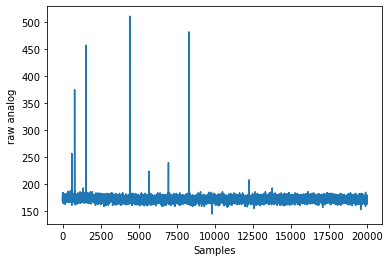

In [38]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(arduinoAdcAnalog)
plt.xlabel('Samples')
plt.ylabel('raw analog')
plt.show()

## Tapping Transducer w/ the Arduino XADC (voltage)

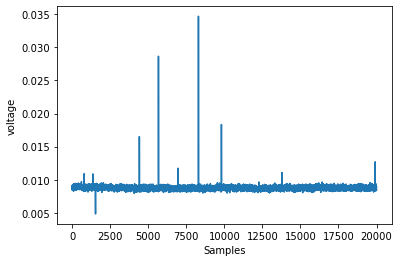

In [39]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(arduinoAdcVoltages)
plt.xlabel('Samples')
plt.ylabel('voltage')
plt.show()

## Tapping Transducer w/ the PMOD ADC (Peripheral Module)

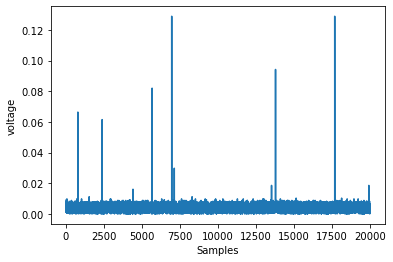

In [40]:
plt.plot(pmodAdcData)
plt.xlabel('Samples')
plt.ylabel('voltage')
plt.show()

----

[Contents](#Contents)

----

## Tracking the IO Error
Report DAC-ADC Pmod Loopback Measurement Error.

In [5]:
from math import ceil
from time import sleep
import numpy as np
import matplotlib.pyplot as plt
from pynq.lib import Pmod_ADC, Pmod_DAC
from pynq.overlays.base import BaseOverlay

ol = BaseOverlay("base.bit")

dac = Pmod_DAC(ol.PMODB)
adc = Pmod_ADC(ol.PMODA)

delay = 0.0
values = np.linspace(0, 2, 20)
samples = []
for value in values:
    dac.write(value)
    sleep(delay)
    sample = adc.read()
    samples.append(sample[0])
    print('Value written: {:4.2f}\tSample read: {:4.2f}\tError: {:+4.4f}'.
          format(value, sample[0], sample[0]-value))

Value written: 0.00	Sample read: 0.00	Error: +0.0015
Value written: 0.11	Sample read: 0.10	Error: -0.0037
Value written: 0.21	Sample read: 0.21	Error: +0.0004
Value written: 0.32	Sample read: 0.31	Error: -0.0072
Value written: 0.42	Sample read: 0.43	Error: +0.0086
Value written: 0.53	Sample read: 0.50	Error: -0.0278
Value written: 0.63	Sample read: 0.62	Error: -0.0144
Value written: 0.74	Sample read: 0.71	Error: -0.0220
Value written: 0.84	Sample read: 0.81	Error: -0.0335
Value written: 0.95	Sample read: 0.93	Error: -0.0177
Value written: 1.05	Sample read: 1.03	Error: -0.0253
Value written: 1.16	Sample read: 1.12	Error: -0.0368
Value written: 1.26	Sample read: 1.21	Error: -0.0484
Value written: 1.37	Sample read: 1.31	Error: -0.0598
Value written: 1.47	Sample read: 1.43	Error: -0.0401
Value written: 1.58	Sample read: 1.53	Error: -0.0516
Value written: 1.68	Sample read: 1.62	Error: -0.0631
Value written: 1.79	Sample read: 1.72	Error: -0.0727
Value written: 1.89	Sample read: 1.81	Error: -

----

[Contents](#Contents)

----

## Error plot with Matplotlib
This example shows plots in notebook (rather than in separate window).

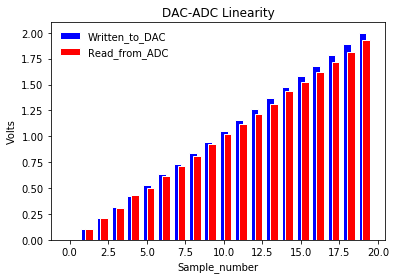

In [6]:
%matplotlib inline
    
X = np.arange(len(values))
plt.bar(X + 0.0, values, facecolor='blue', 
        edgecolor='white', width=0.5, label="Written_to_DAC")
plt.bar(X + 0.25, samples, facecolor='red', 
        edgecolor='white', width=0.5, label="Read_from_ADC")

plt.title('DAC-ADC Linearity')
plt.xlabel('Sample_number')
plt.ylabel('Volts')
plt.legend(loc='upper left', frameon=False)

plt.show()

----

[Contents](#Contents)

----

## Widget controlled plot

In this example, we extend the IO plot with a slider widget to control the number of samples appearing in the output plot.

We use the `ipwidgets` library and the simple `interact()` method to launch a slider bar.

> The interact function (ipywidgets.interact) automatically creates user interface (UI) controls for exploring code and data interactively. It is the easiest way to get started using IPython’s widgets.

For more details see [Using ipwidgets interact()](https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html#)

In [7]:
from math import ceil
from time import sleep
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from ipywidgets import interact
import ipywidgets as widgets

ol = BaseOverlay("base.bit")

dac = Pmod_DAC(ol.PMODB)
adc = Pmod_ADC(ol.PMODA)

def capture_samples(nmbr_of_samples):
    delay = 0.0
    values = np.linspace(0, 2, nmbr_of_samples)
    samples = []
    for value in values:
        dac.write(value)
        sleep(delay)
        sample = adc.read()
        samples.append(sample[0])

    X = np.arange(nmbr_of_samples)
    plt.bar(X + 0.0, values[:nmbr_of_samples+1], 
            facecolor='blue', edgecolor='white', 
            width=0.5, label="Written_to_DAC")
    plt.bar(X + 0.25, samples[:nmbr_of_samples+1], 
            facecolor='red', edgecolor='white', 
            width=0.5, label="Read_from_ADC")

    plt.title('DAC-ADC Linearity')
    plt.xlabel('Sample_number')
    plt.ylabel('Volts')
    plt.legend(loc='upper left', frameon=False)
    plt.show()

_ = interact(capture_samples, 
             nmbr_of_samples=widgets.IntSlider(
                 min=5, max=30, step=5,
                 value=10, continuous_update=False))

----

[Contents](#Contents)

----